**<font color='green'><h1>From Data to Decisions:**</font> A Predictive Model for S&P 500 Stock Prices</h1>

Our GitHub IO Site: [https://github.com/RPonty/cberreteagarponty.github.io](https://github.com/RPonty/cberreteagarponty.github.io)

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import yfinance as yf #Pulling data from Yahoo Finance using Port
pd.set_option("display.max_rows", None, "display.max_columns", None)

<font color='green'>**<h1><u>Project Goal Statement:</h1></u>**

The objective of this project is to create a machine learning model that identifies potential buying opportunities for S&P 500 companies by utilizing fundamental financial data. The model will analyze key metrics, including Price-to-Earnings (P/E) ratios, earnings per share (EPS), revenue growth, profit margins, and debt-to-equity ratios, to assess the stock's valuation.

By exploring the relationships between these fundamental indicators and historical stock performance, the project aims to develop a tool that helps investors and analysts evaluate whether a stock is undervalued or overvalued, thus informing investment decisions.

The primary goal is to showcase the importance of fundamental analysis in determining optimal buying opportunities, offering a data-driven framework for making strategic investment choices.





<font color = 'green'>**<h1><u>Collaboration Plan Statement:</u></h1>**

This collaboration between Robinne Ponty and Carlos Berreteaga aims to leverage our combined skills and expertise in the development of a machine learning model that predicts the yearly stock prices of S&P 500 companies based on fundamental financial data.

**<h3>Tools for Collaboration:</h3>**

<u>Google Colab:</u>
We will use Google Colab for coding, data analysis, and model development, allowing for real-time collaboration and easy access to resources.<br><br>
<u>GitHub:</u> GitHub will be utilized for version control, project management, and sharing code and documentation.

**<h3>Communication:</h3>**

Regular meetings will be scheduled bi-weekly to discuss progress, address challenges, and ensure alignment on project goals. Additional communication will take place via email and collaborative platforms as needed.

**<h3>Timeline:</h3>**

A detailed project timeline will be developed to outline key milestones, deadlines, and deliverables to ensure that the project stays on track and meets its objectives.


<font color='green'>**<h1><u>Dataset 1</u>**:</font> Historical Stock Prices for Berkshire Hathaway Inc. (BRK.B)</h1>

- This data was acquired by importing the Yahoo Finance python library. This information can also be found at the Yahoo Finance website: [https://finance.yahoo.com/quote/BRK-A/history/](https://finance.yahoo.com/quote/BRK-A/history/)

This dataset contains historical stock price information for Berkshire Hathaway Inc. (BRK.B) over a specified period. The dataset includes daily price data, which consists of the following columns:

- **Date**: The trading date.
- **Open**: The price at which the stock opened on that day.
- **High**: The highest price reached during the trading session.
- **Low**: The lowest price reached during the trading session.
- **Close**: The price at which the stock closed for the day.
- **Volume**: The number of shares traded during that day.

This dataset will be used as a primary source for analyzing stock price trends and developing a predictive machine learning model to forecast future prices based on historical performance.



In [ ]:
ticker_symbol = 'BRK-B'

# Fetch historical stock data for Berkshire Hathaway
data = yf.download(ticker_symbol, start='2000-01-01', end='2024-09-30')
df_yearly = data['Close'].resample('YE').last()
df_yearly = df_yearly.reset_index()



[*********************100%***********************]  1 of 1 completed


In [ ]:
#Change Date to Year
# Now, rename the 'Date' column to 'Year'
df_yearly.rename(columns={'Date': 'Year'}, inplace=True)
df_yearly

,Year,Close
0,2000-12-31,47.080002
1,2001-12-31,50.500000
2,2002-12-31,48.459999
3,2003-12-31,56.299999
4,2004-12-31,58.720001
5,2005-12-31,58.709999
6,2006-12-31,73.320000
7,2007-12-31,94.720001
8,2008-12-31,64.279999
9,2009-12-31,65.720001



**<font color = 'green'> <u><h1>Dataset 2</u>:**</font> EPS and P/E Ratios for Berkshire Hathaway Inc. (BRK.B)</h1>

https://companiesmarketcap.com/berkshire-hathaway/eps/

This dataset contains key financial metrics for Berkshire Hathaway Inc. (BRK.B), specifically focusing on Earnings Per Share (EPS) and Price-to-Earnings (P/E) ratios.

**Key Components of the Dataset:**

- **Date**: The date when the EPS and P/E ratio were reported or calculated.
- **Earnings Per Share (EPS)**: This metric indicates the portion of a company's profit allocated to each outstanding share of common stock. EPS is an important indicator of a company's profitability and is often used by investors to gauge financial health.
- **Price-to-Earnings (P/E) Ratio**: This ratio measures the company's current share price relative to its earnings per share. A higher P/E ratio may suggest that investors expect higher growth in the future, while a lower P/E ratio may indicate that the stock is undervalued or that the company is experiencing difficulties.

This dataset will serve as a valuable resource for analyzing Berkshire Hathaway's financial performance and valuation metrics over time. By incorporating EPS and P/E ratios into the predictive machine learning model, investors and analysts can better understand the relationship between these fundamental indicators and stock price movements, aiding in investment decision-making.

**<h3>Cleaning the Data:</h3>**


In [ ]:
import requests
from io import StringIO
from bs4 import BeautifulSoup
import numpy as np


#Fetch the webpage
r = requests.get("https://companiesmarketcap.com/berkshire-hathaway/eps/")

#Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(r.content, "html.parser")

#Find the table you are interested in
table = soup.find("table")

#Use pandas to read the HTML table directly (no need for StringIO here)
df_eps = pd.read_html(StringIO(str(table)))  # pd.read_html expects a string, not a soup object
df_eps = df_eps[0]
#Display the dataframe
display(df_eps)
print(df_eps.dtypes)


,Year,EPS,Change
0,2023 (TTM),$39.77,-487.85%
1,2022,-$10.25,-125.87%
2,2021,$39.63,118.84%
3,2020,$18.11,-45.48%
4,2019,$33.21,1933.47%
5,2018,$1.63,-91.03%
6,2017,$18.22,86.6%
7,2016,$9.76,-0.07%
8,2015,$9.77,21.2%
9,2014,$8.06,2.04%


Year      object
EPS       object
Change    object
dtype: object


In [ ]:
#Change the data types for year to int64, EPS to float64 and Change to float64

#Convert years to int values
df_eps['Year'][0] = 2023
df_eps['Year'] = df_eps['Year'].astype(int)

# Remove the dollar sign and commas from 'EPS' and convert to float64
df_eps['EPS'] = df_eps['EPS'].str.replace('$', '').str.replace(',', '').astype('float64')

# Convert 'Change' to float64
df_eps['Change'] = df_eps['Change'].str.replace('%', '').astype('float64')


<ipython-input-130-331aa6efe3b1>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_eps['Year'][0] = 2023


In [ ]:
display(df_eps)
df_eps.dtypes

,Year,EPS,Change
0,2023,39.77,-487.85
1,2022,-10.25,-125.87
2,2021,39.63,118.84
3,2020,18.11,-45.48
4,2019,33.21,1933.47
5,2018,1.63,-91.03
6,2017,18.22,86.60
7,2016,9.76,-0.07
8,2015,9.77,21.20
9,2014,8.06,2.04


,0
Year,int64
EPS,float64
Change,float64


In [ ]:
df_yearly['Year'] = pd.to_datetime(df_yearly['Year'])
df_yearly['Year'] = df_yearly['Year'].dt.year
df_merged = pd.merge(df_yearly, df_eps, on='Year', how='inner')
df_merged['P/E Ratio'] = df_merged['Close'] / df_merged['EPS']

In [ ]:
df_merged

,Year,Close,EPS,Change,P/E Ratio
0,2000,47.080002,1.46,113.48,32.246577
1,2001,50.500000,0.35,-76.17,144.285714
2,2002,48.459999,1.86,436.28,26.053763
3,2003,56.299999,3.54,90.01,15.903955
4,2004,58.720001,3.17,-10.47,18.523660
5,2005,58.709999,3.69,16.54,15.910569
6,2006,73.320000,4.76,28.96,15.403361
7,2007,94.720001,5.70,19.64,16.617544
8,2008,64.279999,2.15,-62.29,29.897674
9,2009,65.720001,3.46,61.03,18.994220


<font color='green'>**<h1><u>Exploratory Data Analysis (EDA)</u>**:</font></h1>
Below, we included a density diagram of the data collected.

As we can see from the data




<Axes: title={'center': 'Closing Bell Stock Price Over Years'}, xlabel='Year', ylabel='Closing Bell Stock Price'>

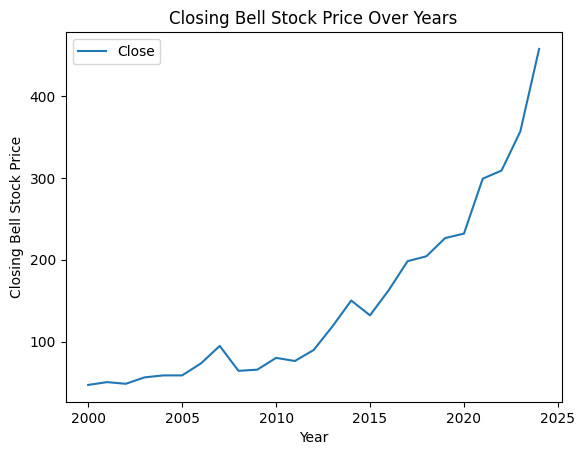

In [ ]:
df_yearly.plot.line(x='Year',
                    y='Close',
                    xlabel='Year',
                    ylabel='Closing Bell Stock Price',
                    title = "Closing Bell Stock Price Over Years")

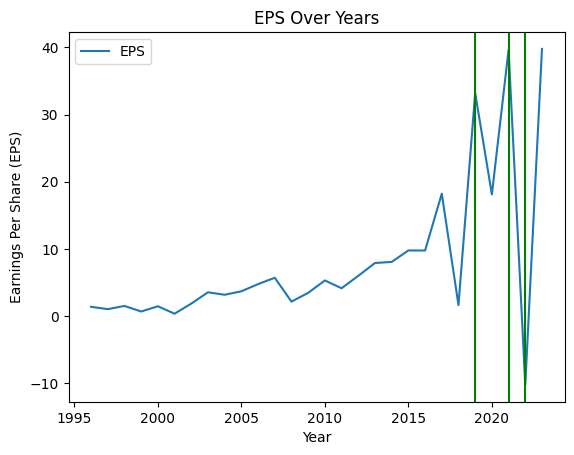

In [ ]:
df_eps.plot.line(x='Year',
                    y='EPS',
                    xlabel='Year',
                    ylabel='Earnings Per Share (EPS)',
                    title = "EPS Over Years")
plt.axvline(x=2019,color='green')
plt.axvline(x=2021,color='green')
plt.axvline(x=2022,color='green')

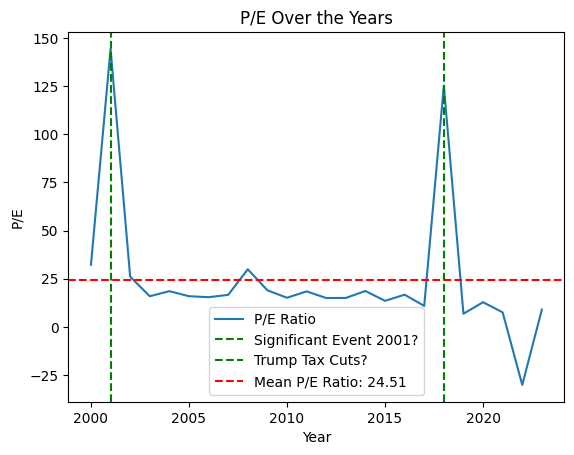

In [ ]:

df_merged.plot.line(x='Year',
                    y='P/E Ratio',
                    xlabel='Year',
                    ylabel='P/E',
                    title="P/E Over the Years")

# Adding vertical lines for significant events
plt.axvline(x=2001, color='green', linestyle='--', label='Significant Event 2001?') # e.g., Enron, 9/11
plt.axvline(x=2018, color='green', linestyle='--', label='Trump Tax Cuts?') # e.g., Trump tax cuts

# Adding a horizontal line for the mean P/E Ratio
mean_pe = df_merged['P/E Ratio'].mean()
plt.axhline(y=mean_pe, color='red', linestyle='--', label=f'Mean P/E Ratio: {mean_pe:.2f}')

# Adding a legend to describe the lines
plt.legend()

# Show the plot
plt.show()



<font color='green'>**<h1><u>Closing Thoughts and Final Goals</u>**:</font></h1>

This project aims to identify potential buying opportunities for Berkshire Hathaway Inc. (BRK.B) using fundamental financial metrics, particularly the Price-to-Earnings (P/E) ratio. By analyzing historical data, we established that a current P/E ratio below the mean may indicate that the stock is undervalued, suggesting a favorable buying opportunity. Conversely, a P/E ratio above the mean could signal overvaluation, warranting caution.

Our exploratory data analysis highlighted key trends and events affecting stock performance (such as the events of 2001 and 2018. In future analysis, we hope to reveal what happened in these dates that influecend the P/E, and how these events can be accounted for in future models)  While the mean P/E ratio provides a useful benchmark, it should not be the sole factor in investment decisions. Investors should consider additional metrics and qualitative factors for a comprehensive evaluation.

Looking forward, we plan to refine our analysis by incorporating more datasets and exploring advanced methodologies to enhance our insights into stock valuation and investment opportunities. Ultimately, this project emphasizes the importance of fundamental analysis in making informed investment decisions.
